In [4]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-10-26 15:28:11,924: Credentials are already in use. The existing account in the session will be replaced.


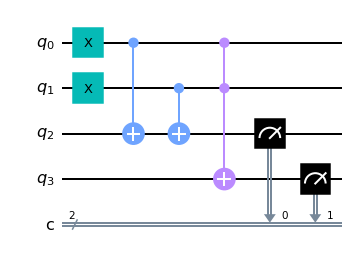

In [5]:
qc = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc.x(0) 
qc.x(1)
# use cnots to write the XOR of the inputs on qubit 2
qc.cx(0,2)
qc.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc.ccx(0,1,3)
# extract outputs
qc.measure(2,0) # extract XOR value
qc.measure(3,1) # extract AND value

qc.draw(output='mpl')

{'10': 1024}


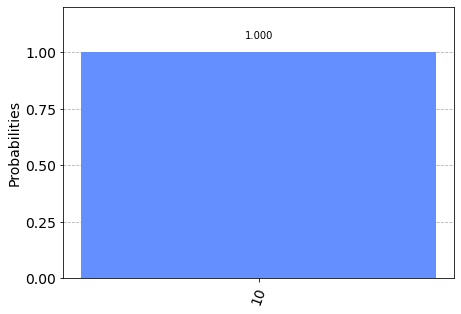

In [6]:
backend=Aer.get_backend('qasm_simulator')
result=execute(qc,backend=backend,shots=1024).result()
counts=result.get_counts(qc)
print(counts)
plot_histogram(counts)